<a href="https://colab.research.google.com/github/hablix/HandGestureDetector/blob/main/modelCreator04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF Lite Model maker


Overview:
https://www.tensorflow.org/lite/examples/image_classification/overview



Tutorials:
https://www.tensorflow.org/lite/tutorials/model_maker_image_classification


Step by step approach:
https://codelabs.developers.google.com/codelabs/recognize-flowers-with-tensorflow-on-android#4


used model maker library:
https://github.com/tensorflow/examples/tree/83a8b6edfa03fca856b8817c29a06c9d93d4f34b/tensorflow_examples/lite/model_maker

In [ ]:
!pip install tflite-model-maker

# Import

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

     |████████████████████████████████| 501kB 3.9MB/s 
     |████████████████████████████████| 645kB 29.6MB/s 
     |████████████████████████████████| 5.5MB 39.0MB/s 
     |████████████████████████████████| 174kB 45.2MB/s 
     |████████████████████████████████| 849kB 39.8MB/s 
     |████████████████████████████████| 1.0MB 42.1MB/s 
     |████████████████████████████████| 1.2MB 40.7MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 122kB 40.8MB/s 
     |████████████████████████████████| 112kB 39.1MB/s 
     |████████████████████████████████| 706kB 37.0MB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 358kB 42.9MB/s 
     |████████████████████████████████| 37.6MB 1.2MB/s 
     |████████████████████████████████| 194kB 48.5MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=c9c23550872be749e5c32bca

In [ ]:
print(tf.__version__)

2.4.1


# Loading Dataset

In [ ]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive')

#dir_base = "/content/gdrive/MyDrive/experiment1/dataset-fruit/data"
#int_res=180
#dir_base = "/content/gdrive/MyDrive/experiment1/dataset-hand1/data"
#int_res=60
dir_base = "/content/gdrive/MyDrive/experiment1/dataset-hand1/data180"
int_res=180

dir_test = dir_base + "/test"
dir_test_d = pathlib.Path(dir_test)

dir_train = dir_base + "/train"
dir_train_d = pathlib.Path(dir_train)
dir_train_p = os.path.join(dir_base, 'train')

dir_test_d.absolute 

Mounted at /content/gdrive


<bound method Path.absolute of PosixPath('/content/gdrive/MyDrive/experiment1/dataset-hand1/data180/test')>

In [ ]:
from pathlib import Path

all_count = len(list(Path(dir_base).glob('**/*')))
print("Number of all files: " + str(all_count))

image_count = sorted(dir_train_d.glob('**/*.jpg'))
print("Number of all images: " + str(all_count))

# Load data
data = ImageClassifierDataLoader.from_folder(dir_train_p)

# set trining validation split
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Number of all files: 902
Number of all images: 902
INFO:tensorflow:Load image with size: 891, num_label: 5, labels: fist, lettero, lettery, palm, thumbup.


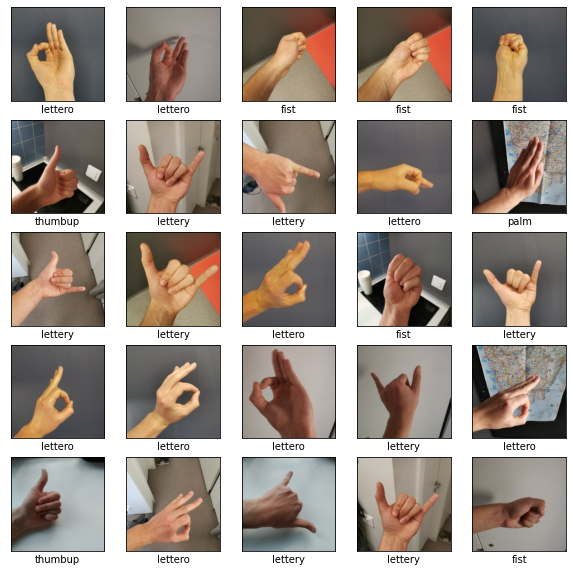

In [ ]:
# Plot random images and classes
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

# Creating the model

Things to varify:
* split
* dropout
* argumantation
* other library
* epochs

### Args:
```

    train_data: Training data.
    model_spec: Specification for the model.
    validation_data: Validation data. If None, skips validation process.
    batch_size: Number of samples per training step. If `use_hub_library` is
      False, it represents the base learning rate when train batch size is 256
      and it's linear to the batch size.
    epochs: Number of epochs for training.
    train_whole_model: If true, the Hub module is trained together with the
      classification layer on top. Otherwise, only train the top classification
      layer.
    dropout_rate: The rate for dropout.
    learning_rate: Base learning rate when train batch size is 256. Linear to
      the batch size.
    momentum: a Python float forwarded to the optimizer. Only used when
      `use_hub_library` is True.
    shuffle: Whether the data should be shuffled.
    use_augmentation: Use data augmentation for preprocessing.
    use_hub_library: Use `make_image_classifier_lib` from tensorflow hub to
      retrain the model.
    warmup_steps: Number of warmup steps for warmup schedule on learning rate.
      If None, the default warmup_steps is used which is the total training
      steps in two epochs. Only used when `use_hub_library` is False.
    model_dir: The location of the model checkpoint files. Only used when
      `use_hub_library` is False.
    do_train: Whether to run training.
    ```

In [ ]:

model = image_classifier.create(
    train_data,
    #model_spec=model_spec.mobilenet_v2_spec, # OR
    #model_spec='efficientnet_lite0',
    validation_data=validation_data,
    epochs = 5,
    batch_size=None,
    train_whole_model=None,
    dropout_rate=None,
    learning_rate=None,
    momentum=None,
    shuffle=False,
    use_augmentation=False,
    use_hub_library=True,
    warmup_steps=None,
    model_dir=None,
    do_train=True
    )


print ('.')
print ('...')
# ACHTUNG: dauert lange!!!

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
22/22 [==============================] - 120s 5s/step - loss: 1.6043 - accuracy: 0.3239 - val_loss: 1.2507 - val_accuracy: 0.5781
Epoch 2/5
22/22 [==============================] - 36s 2s/step - loss: 1.2397 - accuracy: 0.5752 - val_loss: 1.0062 - val_accuracy: 0.8125
Epoch 3/5
22/22 [==============================

# Evaluation

1. Quantity

2. Quality

Paste HERE: Epoch 1/5 22/22 [==============================] - 120s 5s/step - loss: 1.6043 - accuracy: 0.3239 - val_loss: 1.2507 - val_accuracy: 0.5781 Epoch 2/5 22/22 [==============================] - 36s 2s/step - loss: 1.2397 - accuracy: 0.5752 - val_loss: 1.0062 - val_accuracy: 0.8125 Epoch 3/5 22/22 [==============================] - 35s 2s/step - loss: 1.0061 - accuracy: 0.7394 - val_loss: 0.9029 - val_accuracy: 0.8281 Epoch 4/5 22/22 [==============================] - 36s 2s/step - loss: 0.8930 - accuracy: 0.8063 - val_loss: 0.8600 - val_accuracy: 0.8281 Epoch 5/5 22/22 [==============================] - 35s 2s/step - loss: 0.8157 - accuracy: 0.8344 - val_loss: 0.8276 - val_accuracy: 0.8594
('1.6043', '0.3239', '1.2507', '0.5781')
('1.2397', '0.5752', '1.0062', '0.8125')
('1.0061', '0.7394', '0.9029', '0.8281')
('0.8930', '0.8063', '0.8600', '0.8281')
('0.8157', '0.8344', '0.8276', '0.8594')
[[1.6043, 0.3239, 1.2507, 0.5781], [1.2397, 0.5752, 1.0062, 0.8125], [1.0061, 0.7394, 0

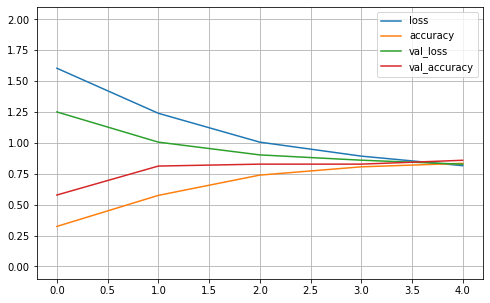

3/3 [==============================] - 15s 4s/step - loss: 0.8076 - accuracy: 0.8667
Test loss: 0.8076142072677612
Test accuracy: 0.8666666746139526


In [ ]:
# Plot results, evaluate

instr = input('Paste HERE: ')
rows = instr.split('/')

import array
import itertools

a = []
for r in rows:
  if  r.startswith( 'step' ) == True:
    k = r[13:19], r[32:38], r[51:57], r[74:80]
    print (k)
    fl = [float(i) for i in k] 
    a.append(fl)
print (a)

import pandas as pd
import matplotlib.pyplot as plt1
pd.DataFrame(a).plot(figsize=(8, 5))
plt1.grid(True)
plt1.ylim(-0.1,2.1)
plt1.legend(("loss","accuracy","val_loss","val_accuracy"))
plt1.show()


loss, accuracy = model.evaluate(test_data)
print('Test loss:', loss)
print('Test accuracy:', accuracy)



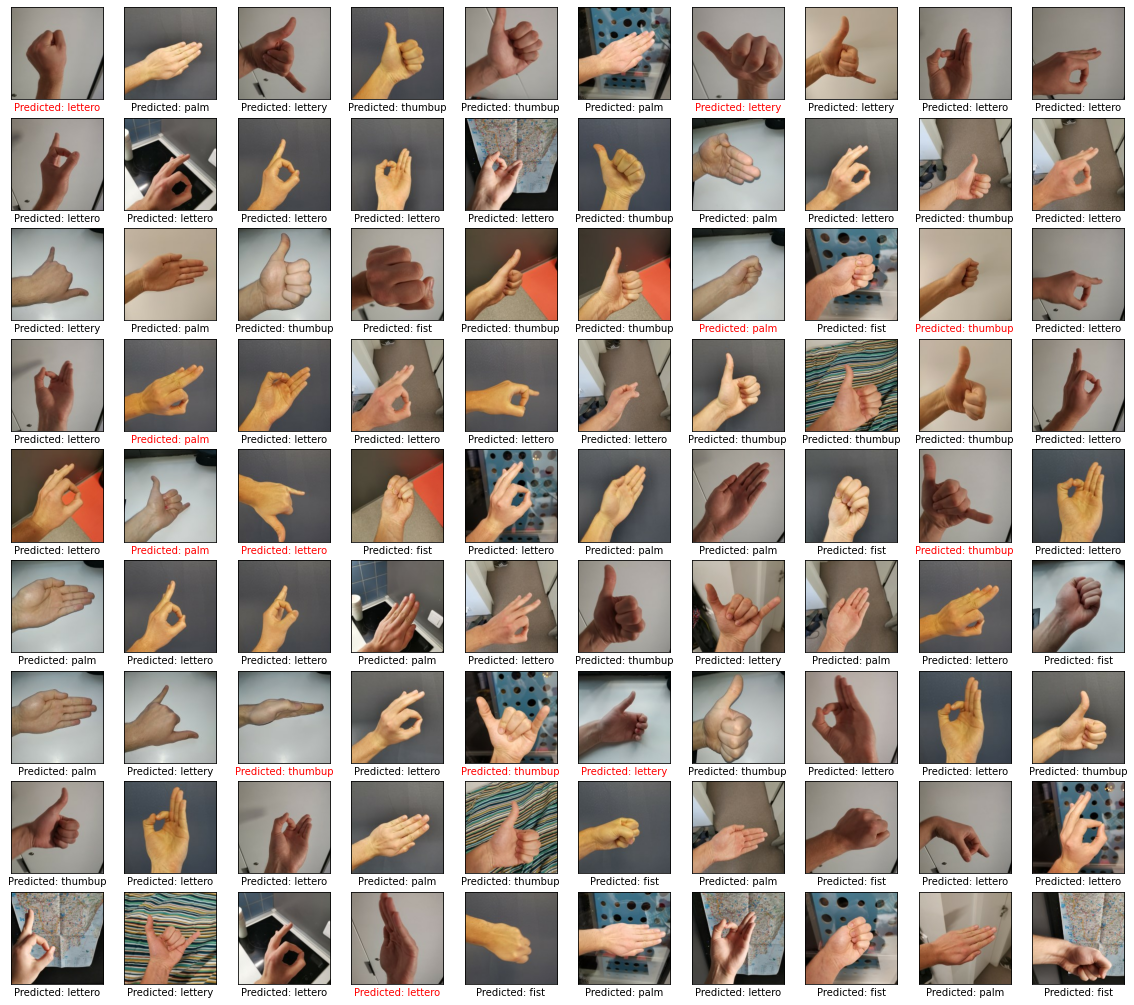

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

# Export model
* model
* labels

* file with accuracy history
* file with accuracy history as graph
* qualitative overview as graph

Time now D20210317T18(20)20
INFO:tensorflow:Assets written to: /tmp/tmpw9xakob1/assets


INFO:tensorflow:Assets written to: /tmp/tmpw9xakob1/assets


INFO:tensorflow:Saving labels in /content/gdrive/MyDrive/experiment1/model/model_D20210317T18(20)20/labels.txt.


INFO:tensorflow:Saving labels in /content/gdrive/MyDrive/experiment1/model/model_D20210317T18(20)20/labels.txt.


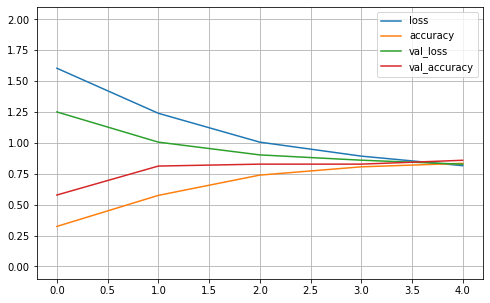

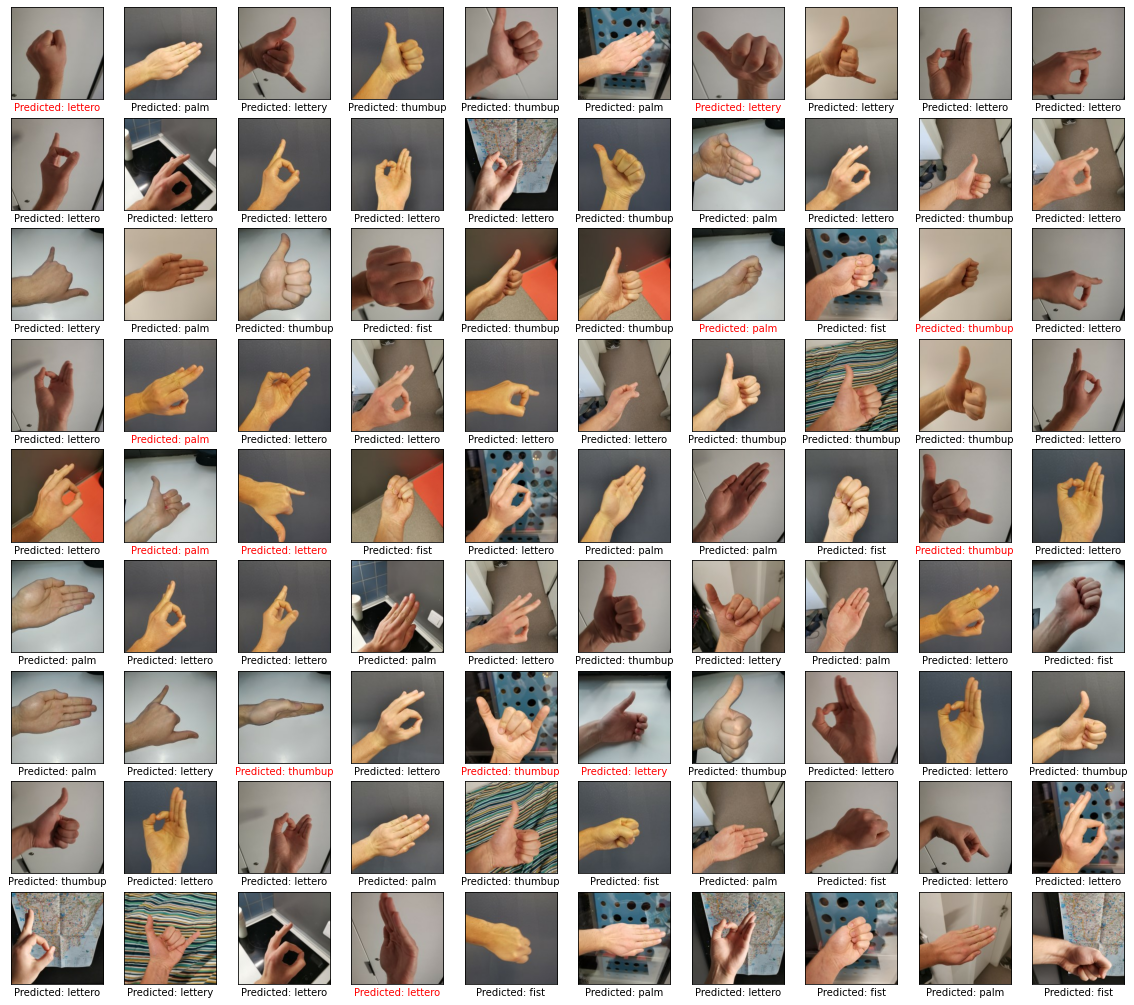

In [ ]:
from datetime import datetime

now = datetime.now()
dt_string = now.strftime("D%Y%m%dT%H(%M)%S")
print("Time now", dt_string)	

newdir = '/content/gdrive/MyDrive/experiment1/model/model_' + dt_string + '/'

# export model
model.export(export_dir=newdir, with_metadata=False)

# export data
with open(newdir+'loss'+str(loss)+'_acc'+str(accuracy)+'.txt', 'w') as file:
  for a1 in a:
    file.write('; '.join(str(item) for item in a1)+'\n')
  file.write('')
  file.write('loss'+str(loss)+'_acc'+str(accuracy))

# save graph 1
import matplotlib.pyplot as plt
pd.DataFrame(a).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(-0.1,2.1)
plt.legend(("loss","accuracy","val_loss","val_accuracy"))

plt.savefig(newdir+'graph.png')
plt.show()


# save graph 2
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)

plt.savefig(newdir+'overview.png')
plt.show()

